In [1]:
"""Plot graphical model for the full model"""

'Plot graphical model for the full model'

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import daft

print(f"matplotlib=={matplotlib.__version__}")
print(f"daft=={daft.__version__}")

matplotlib==3.1.2
daft==0.1.0


In [2]:
plt.style.use('smoh')

plt.rc("font", family="serif", size=12)
plt.rc("text", usetex=True)
plt.rc('text.latex', preamble=[r'\usepackage{bm}', r'\usepackage{amsmath}', r'\renewcommand{\vec}[1]{\boldsymbol{#1}}'])

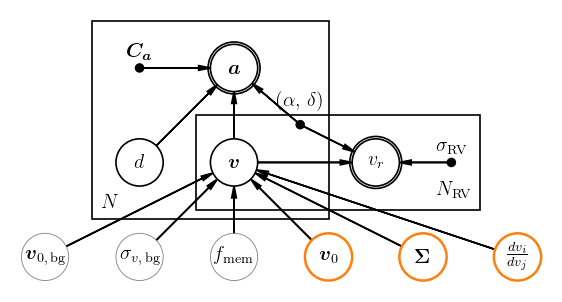

In [3]:
pgm = daft.PGM(observed_style='outer')

nuisance_params = dict(edgecolor="C7", linewidth=0.5)
pgm.add_node("v0_bg", r"$\vec{v}_{0,\,\mathrm{bg}}$", 1, 1, plot_params=nuisance_params)
pgm.add_node("sigv_bg", r"$\sigma_{v,\,\mathrm{bg}}$", 2, 1, plot_params=nuisance_params)
pgm.add_node("f_mem", r"$f_{\mathrm{mem}}$", 3, 1, plot_params=nuisance_params)

key_params = dict(edgecolor="C1", lw=1.5)
pgm.add_node("v0", r"$\vec{v}_0$", 4, 1, plot_params=key_params)
pgm.add_node("sigv", r"$\bm{\Sigma}$", 5, 1, plot_params=key_params)
pgm.add_node("T", r"$\frac{dv_i}{dv_j}$", 6, 1, plot_params=key_params)

pgm.add_node("v", r"$\vec{v}$", 3, 2)
pgm.add_node("d", r"$d$", 2, 2)

pgm.add_node("a", r"$\vec{a}$", 3, 3, observed=True)
pgm.add_node("cov_a", r"$\bm{C}_{\vec{a}}$", 2, 3, fixed=True)


pgm.add_node("pos", r"$(\alpha,\,\delta)$", 3.7, 2.4, fixed=True, offset=[0, 6])
pgm.add_node("rv", r"$v_r$", 4.5, 2, observed=True)
pgm.add_node("rv_err", r"$\sigma_\mathrm{RV}$", 5.3, 2, fixed=True)

# Add in the edges.
pgm.add_edge("d", "a")
pgm.add_edge("cov_a", "a")
pgm.add_edge("v", "a")

pgm.add_edge("pos", "a")
pgm.add_edge("pos", "rv", zorder=-5)

pgm.add_edge("v", "rv")
pgm.add_edge("rv_err", "rv")

pgm.add_edge("v0_bg", "v")
pgm.add_edge("sigv_bg", "v")
pgm.add_edge("f_mem", "v")
pgm.add_edge("v0", "v")
pgm.add_edge("sigv", "v")
pgm.add_edge("T", "v")

# Plates
pgm.add_plate([1.5, 1.5, 2.5, 2], label=r"$N$", shift=-0.1)
pgm.add_plate(
    [2.6, 1.5, 3, 1], label=r"$N_\mathrm{RV}$", shift=0, position="bottom right"
)

# Render and save.
pgm.render()
pgm.savefig("../report/plots/pgm_fullmodel.pdf", dpi=150)